In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sb
%matplotlib inline

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error

In [30]:
df=pd.read_csv('heart.csv')

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
df.isnull().values.any()

False

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [34]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [35]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

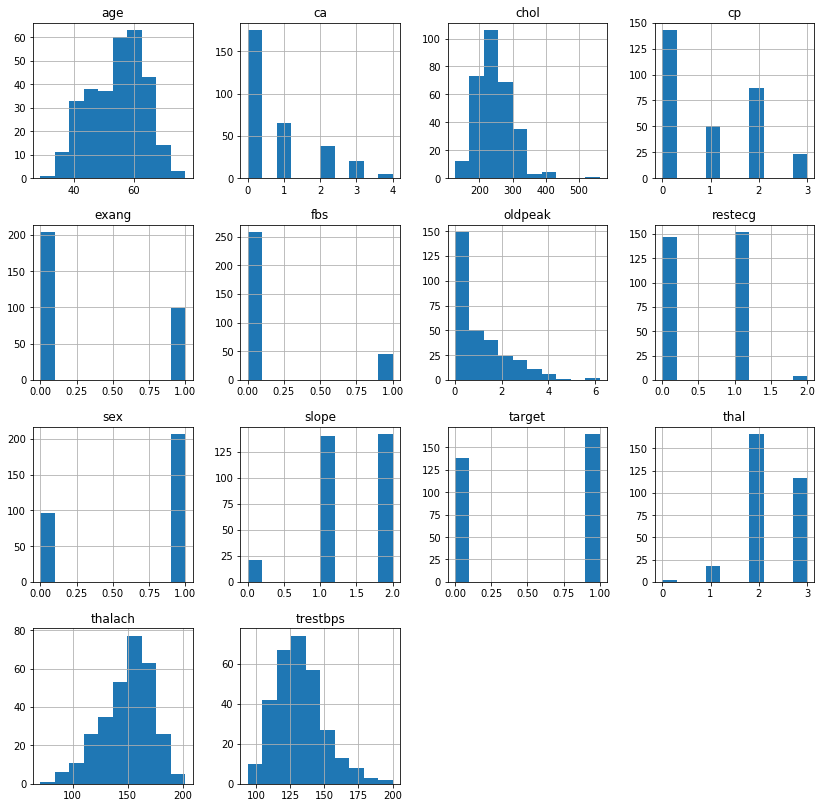

In [36]:
df.hist(figsize=(14,14))
plt.show()

<BarContainer object of 303 artists>

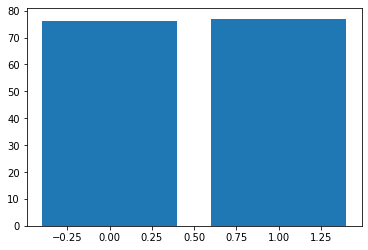

In [37]:
plt.bar(x=df['sex'],height=df['age'])

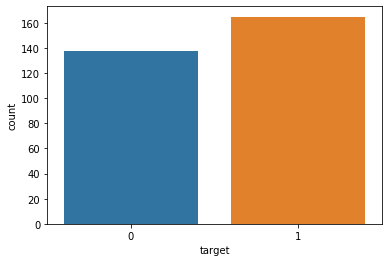

In [38]:

sb.countplot(x='target',data=df)

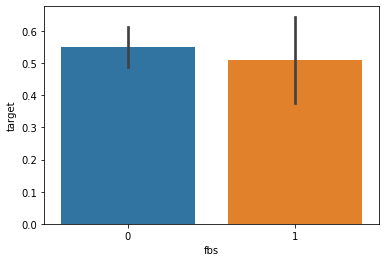

In [41]:
sb.barplot(x="fbs", y="target", data=df)

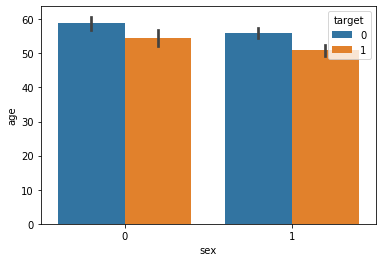

In [43]:
sb.barplot(x=df['sex'],y=df['age'],hue=df['target'])

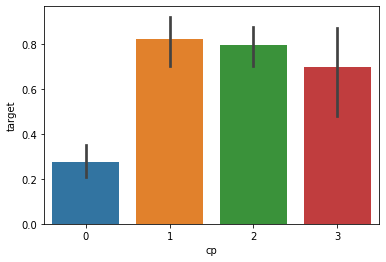

In [44]:
sb.barplot(df["cp"],df['target'])

In [45]:
columns=['trestbps','chol','thalach','age','oldpeak']

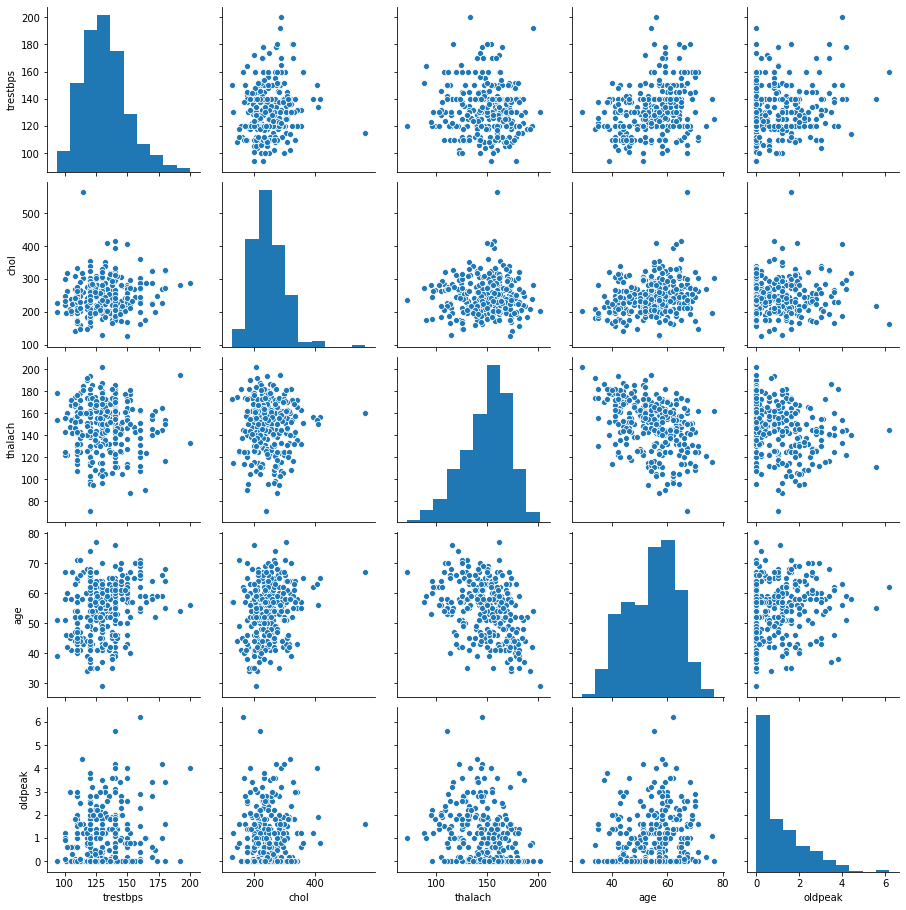

In [46]:
sb.pairplot(df[columns])

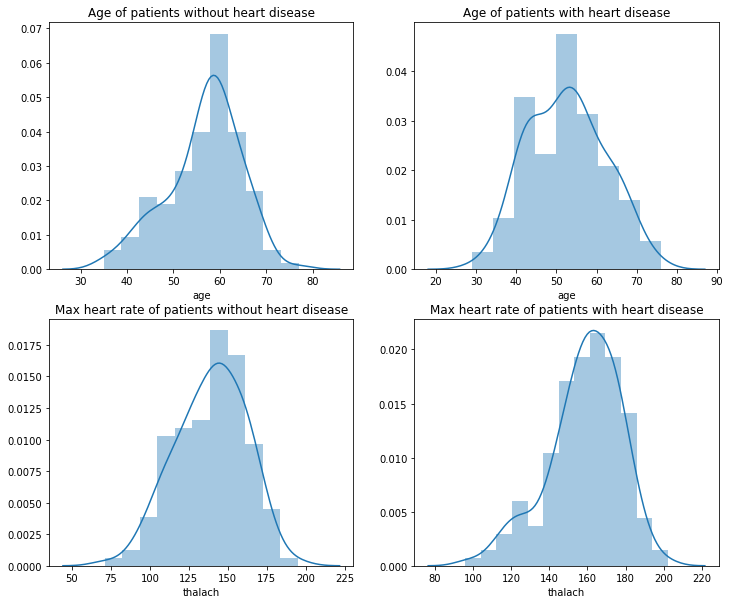

In [48]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sb.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sb.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sb.distplot(df[df['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sb.distplot(df[df['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

In [50]:
X,y=df,df.target
X.drop('target',axis=1,inplace=True)

In [51]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

# train test split

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [151]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [168]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.1,shuffle=True)

In [169]:
X_test

array([[ 0.18017482, -1.46841752, -0.93851463,  0.13571383,  3.14495118,
        -0.41763453, -1.00583187,  0.01544279,  1.43548113,  0.74225984,
        -0.64911323,  1.24459328,  1.12302895],
       [ 0.40075247,  0.68100522,  1.00257707, -1.12077005, -0.31431015,
        -0.41763453, -1.00583187,  0.67140036, -0.69663055,  1.25987717,
        -0.64911323,  0.26508221,  1.12302895],
       [ 1.06248543,  0.68100522,  1.00257707, -0.3783023 ,  1.21240295,
        -0.41763453,  0.89896224, -0.81543681,  1.43548113,  0.65599028,
        -0.64911323, -0.71442887,  1.12302895],
       [-0.81242462,  0.68100522, -0.93851463, -1.12077005, -0.81677269,
        -0.41763453,  0.89896224, -0.29067075, -0.69663055, -0.81059216,
         0.97635214, -0.71442887, -0.51292188],
       [-0.48155814,  0.68100522, -0.93851463,  1.04952029, -0.06307888,
        -0.41763453, -1.00583187, -0.94662832, -0.69663055,  1.34614673,
        -0.64911323, -0.71442887,  1.12302895],
       [-1.91531289,  0.681005

In [170]:
y_test

246    0
183    0
229    0
126    1
184    0
1      1
59     1
194    0
132    1
175    0
162    1
181    0
296    0
164    1
219    0
92     1
195    0
198    0
24     1
249    0
139    1
26     1
287    0
64     1
202    0
240    0
285    0
186    0
127    1
191    0
47     1
Name: target, dtype: int64

In [171]:
scores_dict = {}

# DecisionTree

In [172]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [173]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [174]:
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print(accuracy_dt)

74.19354838709677


In [175]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.742


# KNeighborsClassifier

In [176]:
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 10 with score : 0.9032258064516129


In [177]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [178]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(y_test,prediction_knn)*100,'%')
print('mean_squared_error score : ',mean_squared_error(y_test,prediction_knn)*100,'%')

accuracy_score score     :  90.32258064516128 %
mean_squared_error score :  9.67741935483871 %


In [179]:
scores_dict['KNeighborsClassifier'] = accuracy_knn
accuracy_knn

90.32258064516128

In [180]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.871
Accuracy on test set: 0.903


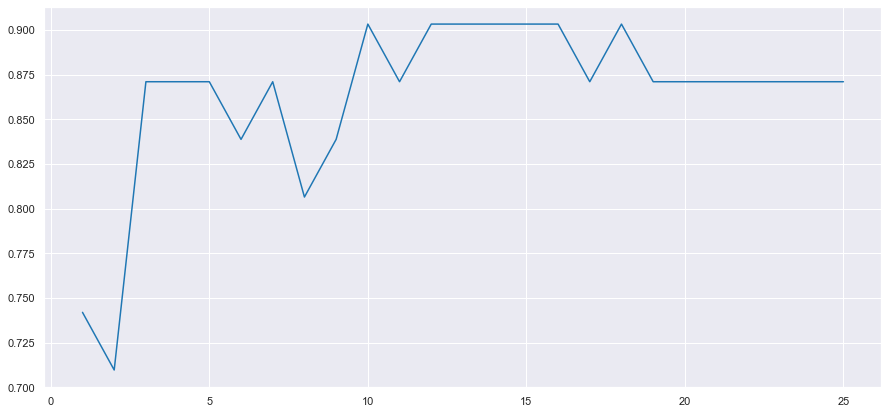

In [181]:
plt.plot(k_range,scores_list)

# SVC

In [182]:
model = SVC(C=2.0,kernel='rbf',gamma='auto').fit(X_train,y_train)
Y_predict = model.predict(X_test)
print('Accuracy score : {}%'.format(accuracy_score(y_test,Y_predict)*100))
scores_dict['SVC'] = accuracy_score(y_test,Y_predict)*100

Accuracy score : 83.87096774193549%


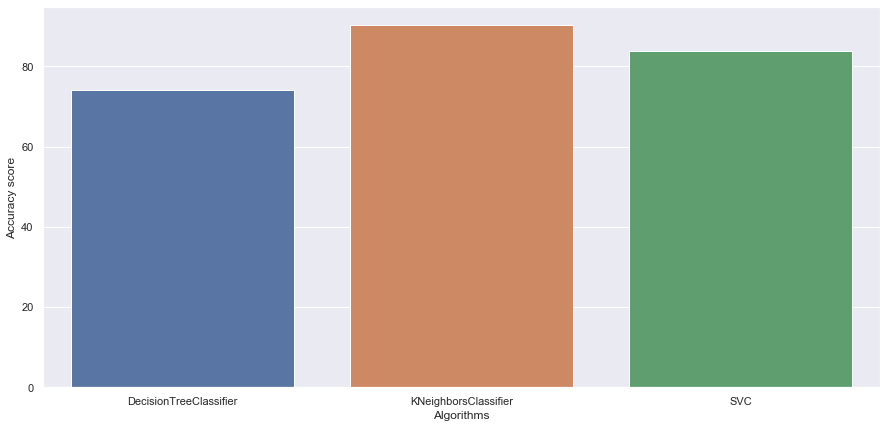

In [183]:
with sb.color_palette('muted'):
  algo_name = list(scores_dict.keys())
  scoress = list(scores_dict.values())

  sb.set(rc={'figure.figsize':(15,7)})
  plt.xlabel("Algorithms")
  plt.ylabel("Accuracy score")

  sb.barplot(algo_name,scoress)